In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

%matplotlib inline

In [12]:
# Load data
data_path = os.path.join("..", "data", "cleaned", "data_with_currency.csv")
data = pd.read_csv(data_path)
data.head ()

,Location,Price,Commission,TVA,Currency,Rooms,Size,Floor,Composition
0,Marasti,178000,NaN,False,True,3,73.0,5/6,Dec
1,Marasti,133300,NaN,True,True,3,62.0,3/6,Semidec
2,Zorilor,155646,NaN,True,True,3,63.0,1/4,Dec
3,Manastur,150000,Comision 0%,False,True,3,70.0,6/10,Dec
4,Manastur,127990,Comision 0%,False,True,2,49.0,7/10,Semidec


# Mutual Information

In [13]:
# mutual information regression
def make_mi_scores (X, y, discrete_features):
    mi_scores = mutual_info_regression (X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [14]:
le = LabelEncoder()

def handle_categorical_features (data):
  categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
  le.fit(data[categorical_cols].values.ravel())  # Fit on all categories (including unseen)
  return categorical_cols

def encode_label(col):
  return le.transform(col)

train_categorical_columns = handle_categorical_features (data)
data[train_categorical_columns] = data[train_categorical_columns].apply(encode_label)

In [15]:
X_train = data.drop('Price', axis=1)
y_train = data['Price']

discrete_features = X_train.dtypes == int
mi_scores = make_mi_scores(X_train, y_train, discrete_features)
mi_scores 

Size           1.130203
Floor          0.647270
Location       0.431729
Rooms          0.392468
Composition    0.034976
TVA            0.033566
Commission     0.006498
Currency       0.005470
Name: MI scores, dtype: float64

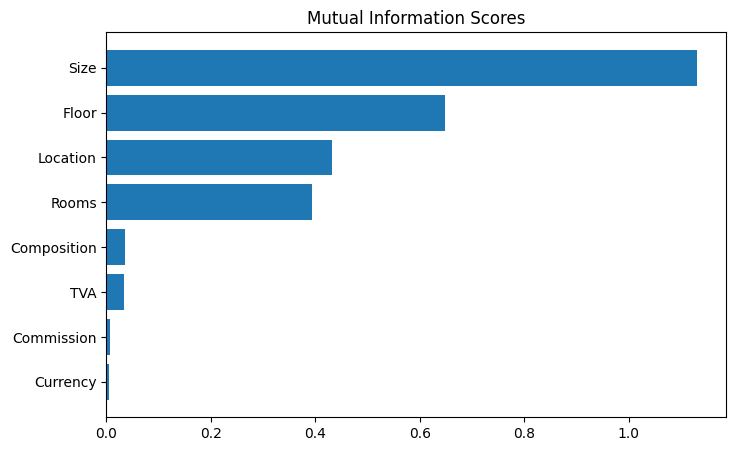

In [16]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

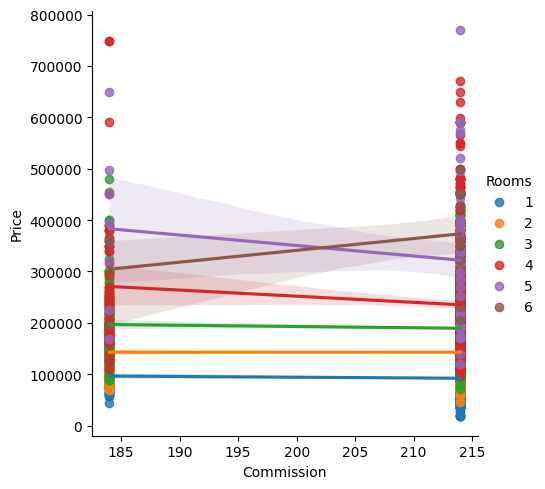

In [17]:
sns.lmplot(x="Commission", y="Price", hue="Rooms", data=data)